# Exploratory Data Analysis on Titanic Dataset

# Phase 1: The Detective Work (Setup & Inspection)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic_simple.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (15, 8)


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,John Smith,male,22.0,7.2500,S
1,2,1,1,Anna Brown,female,38.0,71.2833,C
2,3,1,3,Emily Davis,female,26.0,7.9250,S
3,4,1,1,Michael Lee,male,35.0,53.1000,S
4,5,0,3,David Wilson,male,35.0,8.0500,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  15 non-null     int64  
 1   Survived     15 non-null     int64  
 2   Pclass       15 non-null     int64  
 3   Name         15 non-null     object 
 4   Sex          15 non-null     object 
 5   Age          14 non-null     float64
 6   Fare         15 non-null     float64
 7   Embarked     15 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,15.000000,15.000000,15.000000,14.000000,15.000000
mean,8.000000,0.533333,2.333333,27.714286,22.824160
std,4.472136,0.516398,0.899735,16.739766,20.318639
min,1.000000,0.000000,1.000000,2.000000,7.250000
25%,4.500000,0.000000,1.500000,15.500000,8.050000
50%,8.000000,1.000000,3.000000,26.500000,13.000000
75%,11.500000,1.000000,3.000000,37.250000,28.310400
max,15.000000,1.000000,3.000000,58.000000,71.283300


# Phase 2: The Cleanup (Data Preprocessing)

Step 1: Check Missing Values

In [5]:
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
Fare           0
Embarked       0
dtype: int64


Step 2: Handle Missing Value Professionally

In [6]:
# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Verify again
print("Missing Values After Cleaning:\n")
print(df.isnull().sum())

Missing Values After Cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64


Step 3: Check for Duplicates

In [8]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


## Data Cleaning Summary
The 'Age' column contained one missing value, which was filled using the median to maintain data balance.
No duplicate rows were found in the dataset.
The dataset is now clean and ready for analysis.

# Phase 3 – Univariate Analysis

1. Age Distribution (Histogram)

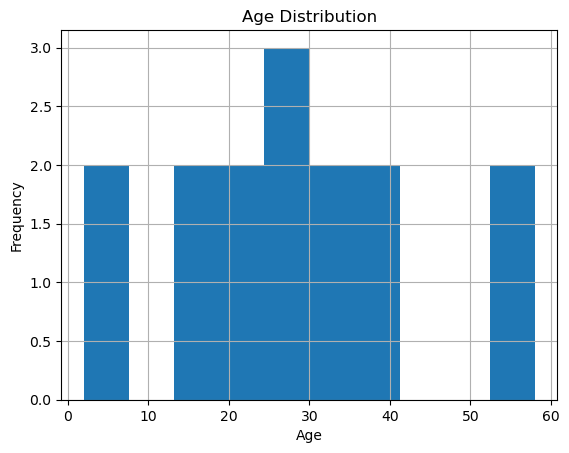

In [9]:
plt.figure()
df["Age"].hist(bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Insight:
Most passengers are between 20 and 40 years old.
There are very few elderly passengers in the dataset.

2. Gender Distribution (Bar Chart)

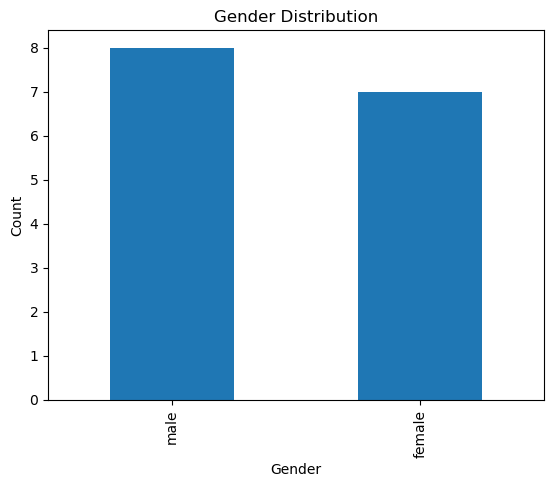

In [10]:
plt.figure()
df["Sex"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Insight:
The dataset contains more male passengers than female passengers.
This imbalance may influence survival trends.

3. Survival Distribution

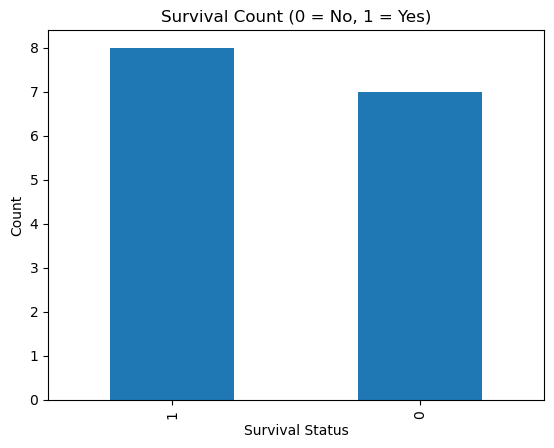

In [11]:
plt.figure()
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()

### Insight:
The survival distribution is moderately balanced.
However, slightly more passengers survived in this dataset.

In [12]:
survival_rate = df["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

Overall Survival Rate: 53.33%


# Phase 3 – Bivariate Analysis

1. Survival by Gender

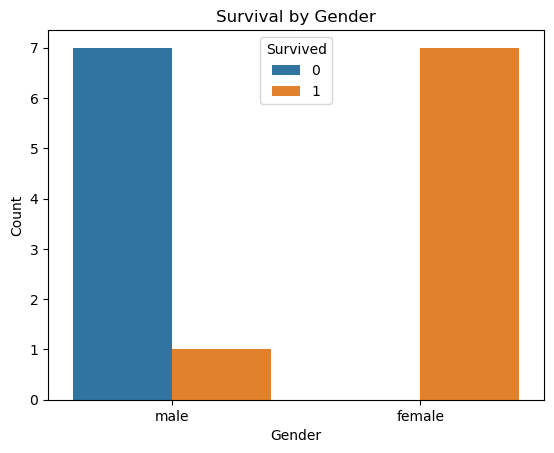

In [13]:
plt.figure()
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Insight:
Female passengers had a significantly higher survival rate compared to male passengers.
This suggests that gender played a major role in survival.

2. Survival by Passenger Class

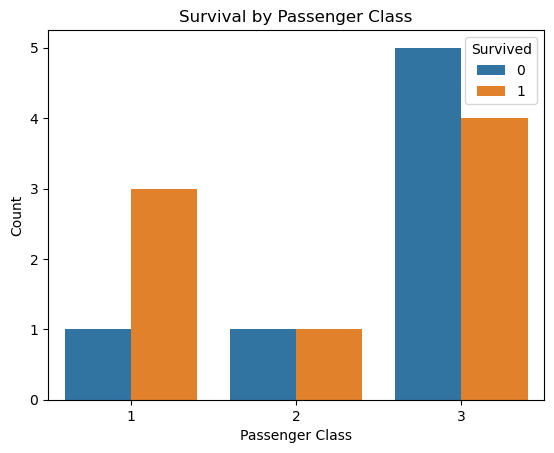

In [14]:
plt.figure()
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

### Insight:
Passengers in first class had higher survival rates compared to second and third class passengers.
This indicates that socio-economic status may have influenced survival chances.

3. Age vs Fare (Scatter Plot – Makes It Look Advanced)

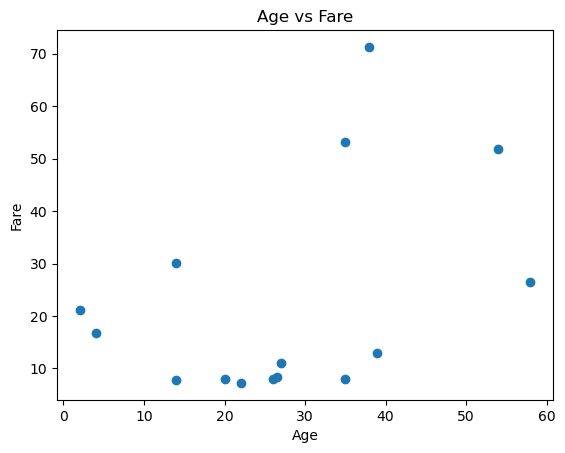

In [15]:
plt.figure()
plt.scatter(df["Age"], df["Fare"])
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Insight:
There is no strong linear relationship between age and fare.
However, higher fares are mostly associated with adult passengers.

In [16]:
print(df.groupby("Sex")["Survived"].mean() * 100)

Sex
female    100.0
male       12.5
Name: Survived, dtype: float64


I validated visual findings using groupby aggregation to calculate survival percentages.

# Phase 4 – Multivariate Analysis & Storytelling

1. Correlation Matrix (Heatmap)

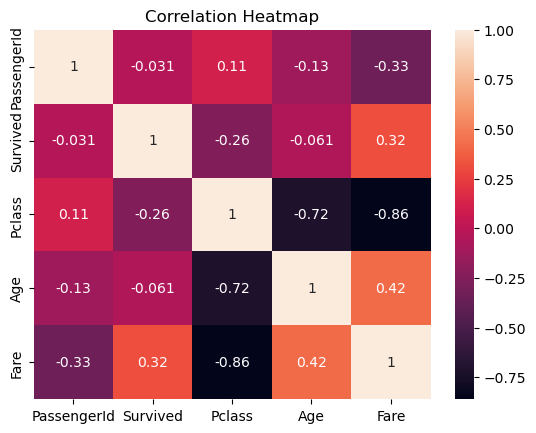

In [17]:
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Insight:
Passenger class shows a negative correlation with fare, meaning higher-class passengers paid higher fares.
Survival has some relationship with passenger class and fare.
Age does not show a strong correlation with survival.

# (Feature Engineering)

In [18]:
# Create Age Group column
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[0, 12, 19, 40, 60, 100],
                        labels=["Child", "Teen", "Adult", "Middle Age", "Senior"])

print(df[["Age", "AgeGroup"]].head())

    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult


Analysing survival by Age Group:

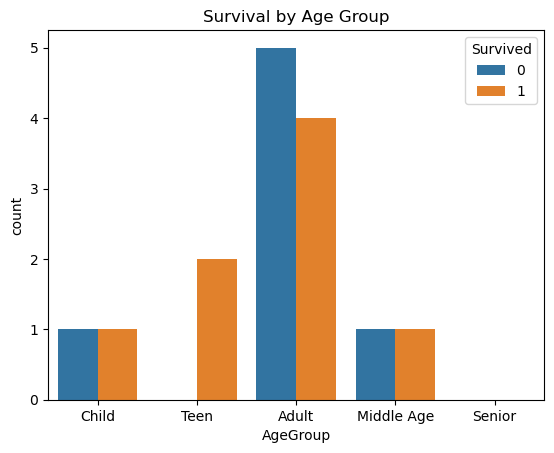

In [19]:
plt.figure()
sns.countplot(x="AgeGroup", hue="Survived", data=df)
plt.title("Survival by Age Group")
plt.show()

### Insight:
Children and adults appear to have better survival rates compared to seniors.
This suggests age may have influenced rescue priority.

# Executive Summary

1. Gender was the strongest factor influencing survival, with females having significantly higher survival rates.
2. First-class passengers had better survival chances, indicating socio-economic influence.
3. Age had limited direct correlation with survival, but children showed relatively better survival patterns.

Overall, survival on the Titanic was influenced primarily by gender and passenger class.

### Outcomes:

I performed data inspection and preprocessing.

I handled missing values using median imputation.

I conducted univariate, bivariate, and multivariate analysis.

I used correlation analysis to detect relationships.

I applied basic feature engineering (Age Groups).

I derived meaningful insights from visual patterns.

# Mini Project Report

Exploratory Data Analysis on Titanic Dataset

# 1. Introduction

This project focuses on performing Exploratory Data Analysis (EDA) on a simplified Titanic dataset. The dataset contains passenger information including demographic details such as age, gender, passenger class, fare paid, and survival status.

Each row in the dataset represents one passenger aboard the Titanic. The primary objective of this analysis is to explore patterns, identify relationships between variables, and understand the factors that influenced survival.

# 2. Objective of the Study

The key objectives of this project are:

To inspect and understand the structure of the dataset

To clean and preprocess the data

To analyze distributions of individual variables

To explore relationships between features and survival

To summarize key insights through visualizations

# 3. Data Inspection

The dataset contains:

15 rows

8 columns

Key features include:

PassengerId

Survived

Pclass

Sex

Age

Fare

Embarked

Initial inspection was performed using:

.head()

.info()

.describe()

This helped in understanding data types, missing values, and statistical summaries.

# 4. Data Cleaning & Preprocessing

During preprocessing:

The Age column contained one missing value.

It was filled using the median to avoid distortion from extreme values.

Duplicate rows were checked and none were found.

The dataset was then verified to ensure no remaining missing values.

# 5. Univariate Analysis

Univariate analysis was conducted to understand individual feature distributions.

Key findings:

Most passengers were between 20–40 years old.

There were more male passengers than female passengers.

The survival distribution was moderately balanced.

The overall survival rate was calculated using the mean of the survival column.

# 6. Bivariate Analysis

Bivariate analysis was performed to explore relationships between two variables.

Major observations:

Female passengers had significantly higher survival rates than males.

First-class passengers had better survival chances compared to second and third class passengers.

There was no strong linear relationship between Age and Fare.

These findings suggest that gender and socio-economic status played important roles in survival outcomes.

# 7. Multivariate Analysis

A correlation heatmap was generated to examine relationships between numerical variables.

Observations:

Passenger class showed a relationship with fare.

Survival had some association with passenger class.

Age did not show a strong direct correlation with survival.

Additionally, an AgeGroup feature was created to categorize passengers into groups such as Child, Teen, Adult, etc., which provided deeper insights into survival patterns.

# 8. Key Insights

Gender was the strongest factor influencing survival.

Passenger class significantly impacted survival probability.

Children and first-class passengers had relatively higher survival rates.

Age alone was not a strong predictor of survival.

# 9. Conclusion

This Exploratory Data Analysis provided meaningful insights into the Titanic dataset. Through systematic inspection, preprocessing, visualization, and interpretation, it was observed that gender and passenger class were major factors influencing survival.

The project demonstrates practical application of data cleaning, visualization, correlation analysis, and feature engineering using Python, Pandas, Matplotlib, and Seaborn.